In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap
from IPython.display import display, clear_output
import time
from ACO import ACOPathFinder
from ABC import ABCPathFinder
from PSO import PSOPathFinder


<div style="border-top: 10px solid blue; border-bottom: 10px solid blue; padding: 20px;">
    <h1 style="color: red; font-size: 50px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        create visualize Maze
    </h1>
</div>

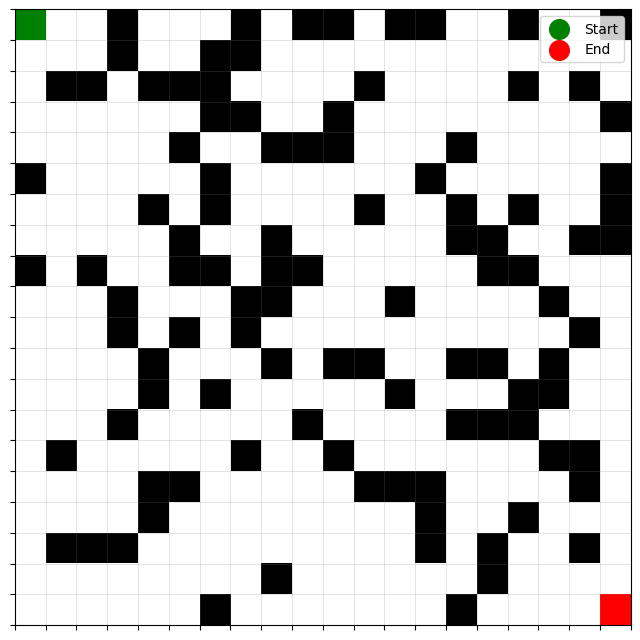

In [29]:

random.seed(42)  
np.random.seed(42)

def create_maze(width, height, obstacle_density=0.3):
    maze = np.zeros((height, width))
    
    for i in range(height):
        for j in range(width):
            if random.random() < obstacle_density:
                maze[i,j] = 1
                
   
    maze[0, 0] = 2
    start_pos = (0, 0)
    
    
    maze[-1, -1] = 3
    end_pos = (height-1, width-1)
    
    
    maze[0, 1] = 0
    maze[1, 0] = 0
    maze[-2, -1] = 0
    maze[-1, -2] = 0
    
    return maze, start_pos, end_pos


maze_width, maze_height = 20, 20
maze, start_pos, end_pos = create_maze(maze_width, maze_height, 0.25)


GLOBAL_MAZE = maze
GLOBAL_START_POS = start_pos
GLOBAL_END_POS = end_pos


def visualize_maze(maze, title=" Maze "):
    
    
    cmap = ListedColormap(['white', 'black', 'green', 'red'])
    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap=cmap)
    
   
    plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    plt.xticks(np.arange(-0.5, maze_width, 1), [])
    plt.yticks(np.arange(-0.5, maze_height, 1), [])
    
   
    plt.scatter(start_pos[1], start_pos[0], c='green', s=200, marker='o', label='Start')
    plt.scatter(end_pos[1], end_pos[0], c='red', s=200, marker='o', label='End')
    plt.legend()
    plt.show()


visualize_maze(maze)



<div style="border-top: 10px solid blue; border-bottom: 10px solid blue; padding: 20px;">
    <h1 style="color: red; font-size: 50px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
        ACO 
    </h1>
</div>

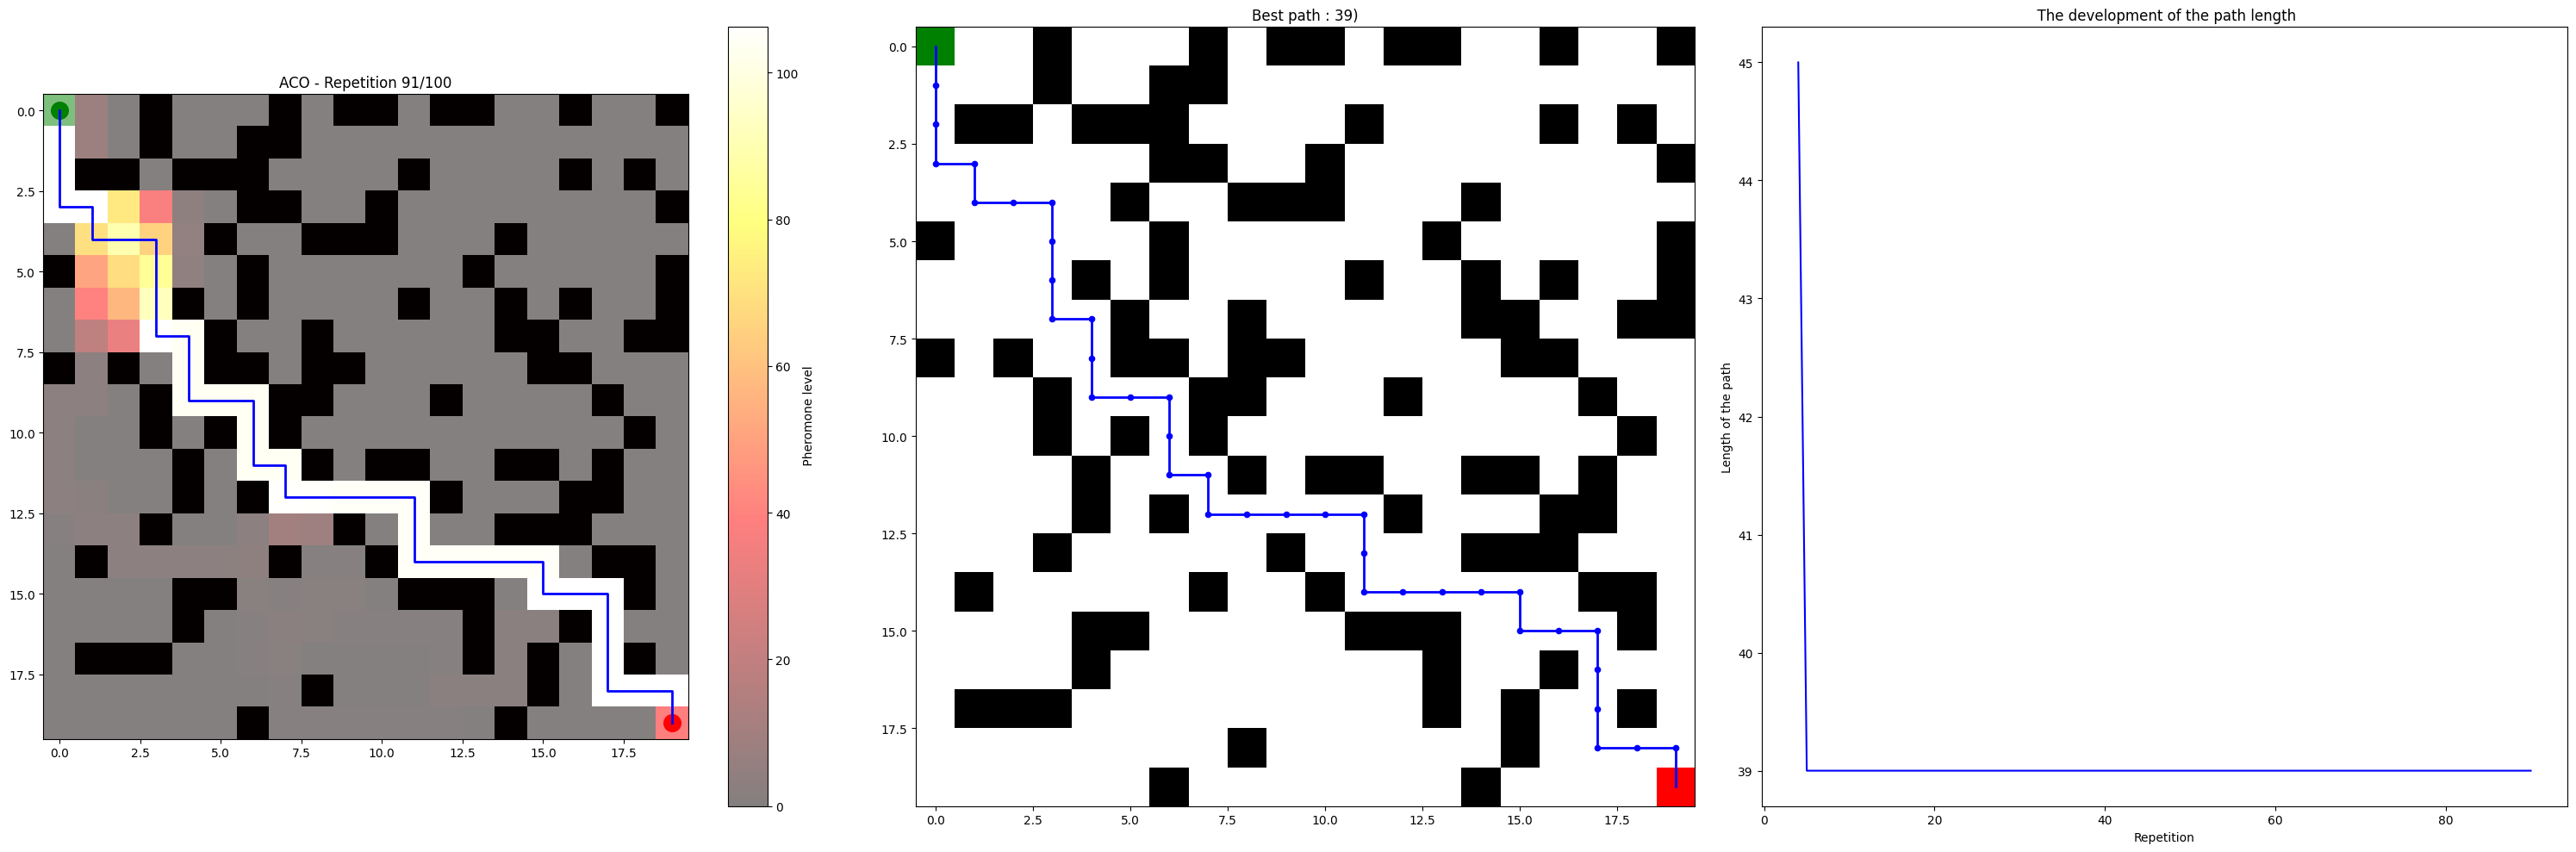

In [30]:
aco = ACOPathFinder(maze, start_pos, end_pos, 
                    n_ants=50, n_iterations=100,
                    evaporation_rate=0.3,
                    alpha=1, beta=3, q=50)

start_time = time.time()
aco_best_path, aco_best_length, history = aco.run()
aco_time = time.time() - start_time


 The best length for the path : 39
The time taken : 13.77 second


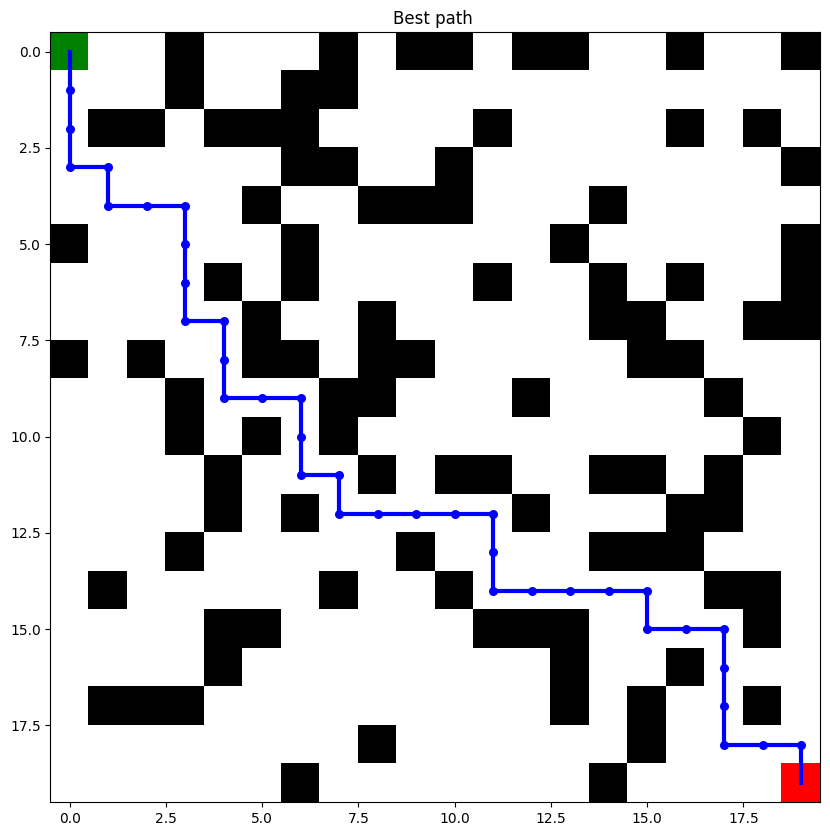

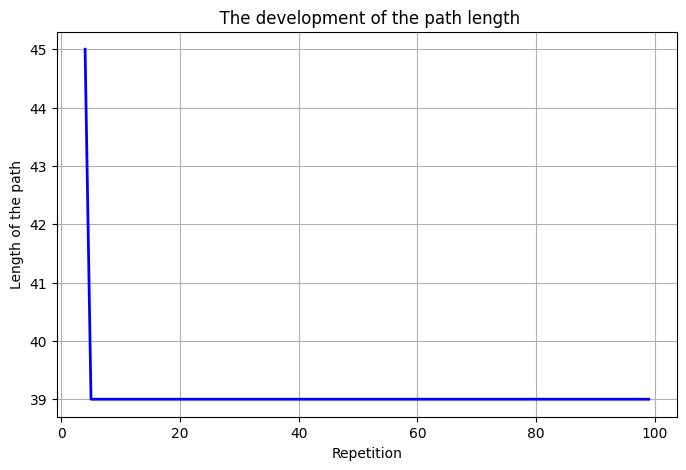

In [31]:
print(f" The best length for the path : {aco_best_length}")
print(f"The time taken : {aco_time:.2f} second")


plt.figure(figsize=(10, 10))
plt.imshow(maze, cmap=ListedColormap(['white', 'black', 'green', 'red']))
path_x = [p[1] for p in aco_best_path]
path_y = [p[0] for p in aco_best_path]
plt.plot(path_x, path_y, 'b-', linewidth=3)
plt.scatter(path_x, path_y, c='blue', s=30)
plt.title("Best path ")
plt.scatter(start_pos[1], start_pos[0], c='green', s=200, marker='o')
plt.scatter(end_pos[1], end_pos[0], c='red', s=200, marker='o')
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(history, 'b-', linewidth=2)
plt.xlabel('Repetition')
plt.ylabel('Length of the path')
plt.title('  The development of the path length ')
plt.grid(True)
plt.show()


<div style="border-top: 10px solid blue; border-bottom: 10px solid blue; padding: 20px;">
    <h1 style="color: red; font-size: 50px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
       ABC
    </h1>
</div>

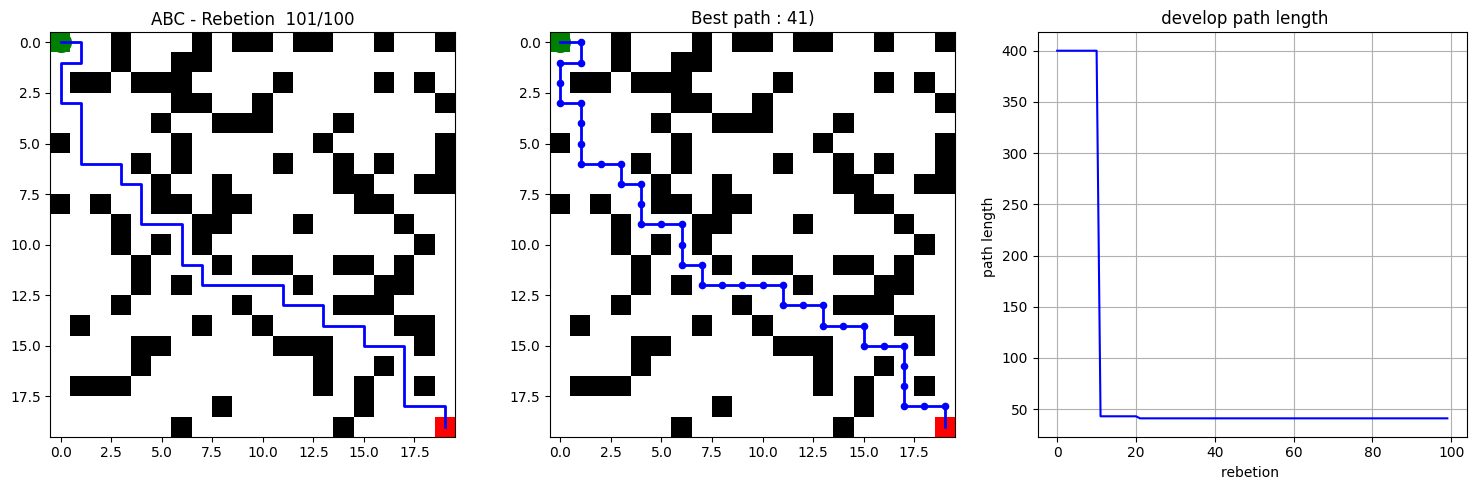

  best path : 41
  time taken : 6.73 second 


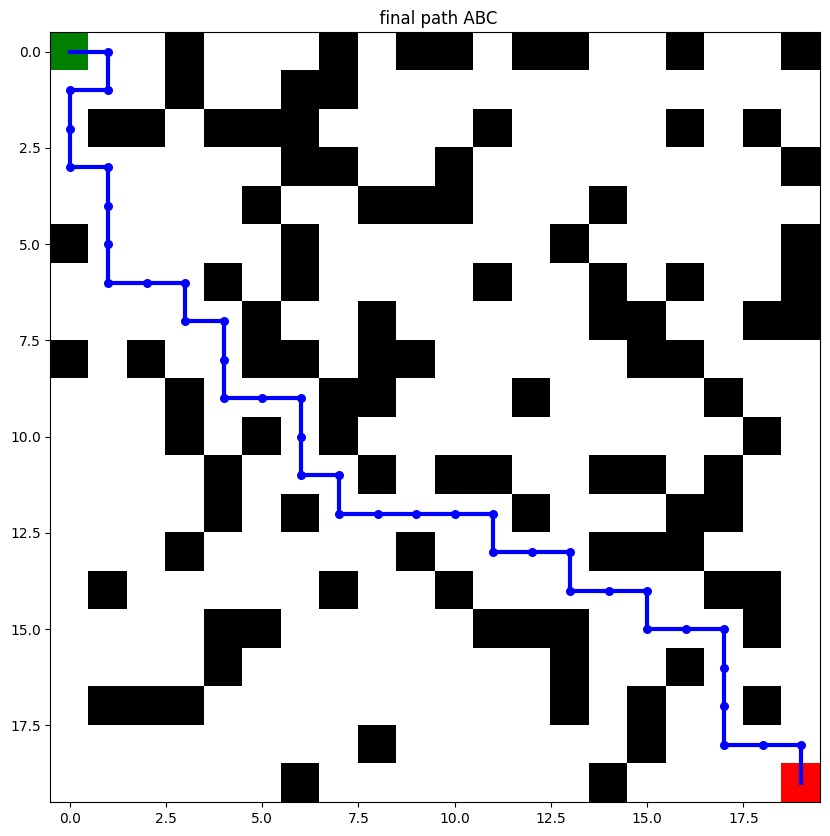

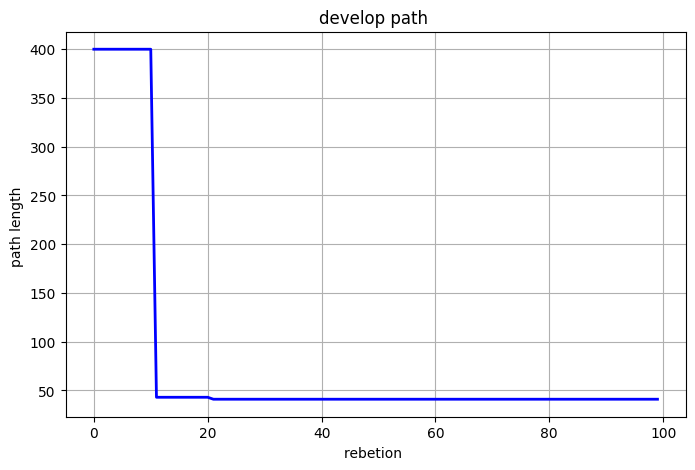

In [32]:

abc = ABCPathFinder(maze, start_pos, end_pos, 
                   n_bees=50, n_iterations=100,
                   limit=30, scout_bee_ratio=0.2)

start_time = time.time()
abc_path, abc_length, abc_history = abc.run()
abc_time = time.time() - start_time

print(f"  best path : {abc_length if abc_path is not None else 'non '}")
print(f"  time taken : {abc_time:.2f} second ")

if abc_path is not None:
   
    plt.figure(figsize=(10, 10))
    plt.imshow(maze, cmap=ListedColormap(['white', 'black', 'green', 'red']))
    path_x = [p[1] for p in abc_path]
    path_y = [p[0] for p in abc_path]
    plt.plot(path_x, path_y, 'b-', linewidth=3)
    plt.scatter(path_x, path_y, c='blue', s=30)
    title = "  final path ABC " if abc_path[-1] == end_pos else "non "
    plt.title(title)
    plt.scatter(start_pos[1], start_pos[0], c='green', s=200, marker='o')
    plt.scatter(end_pos[1], end_pos[0], c='red', s=200, marker='o')
    plt.show()
    

    plt.figure(figsize=(8, 5))
    plt.plot(abc_history, 'b-', linewidth=2)
    plt.xlabel('rebetion ')
    plt.ylabel('path length ')
    plt.title('develop path ')
    plt.grid(True)
    plt.show()
else:
    print(" non ")

<div style="border-top: 10px solid blue; border-bottom: 10px solid blue; padding: 20px;">
    <h1 style="color: red; font-size: 50px; text-align: center; font-family: Arial, sans-serif; margin: 0;">
       PSO 
    </h1>
</div>

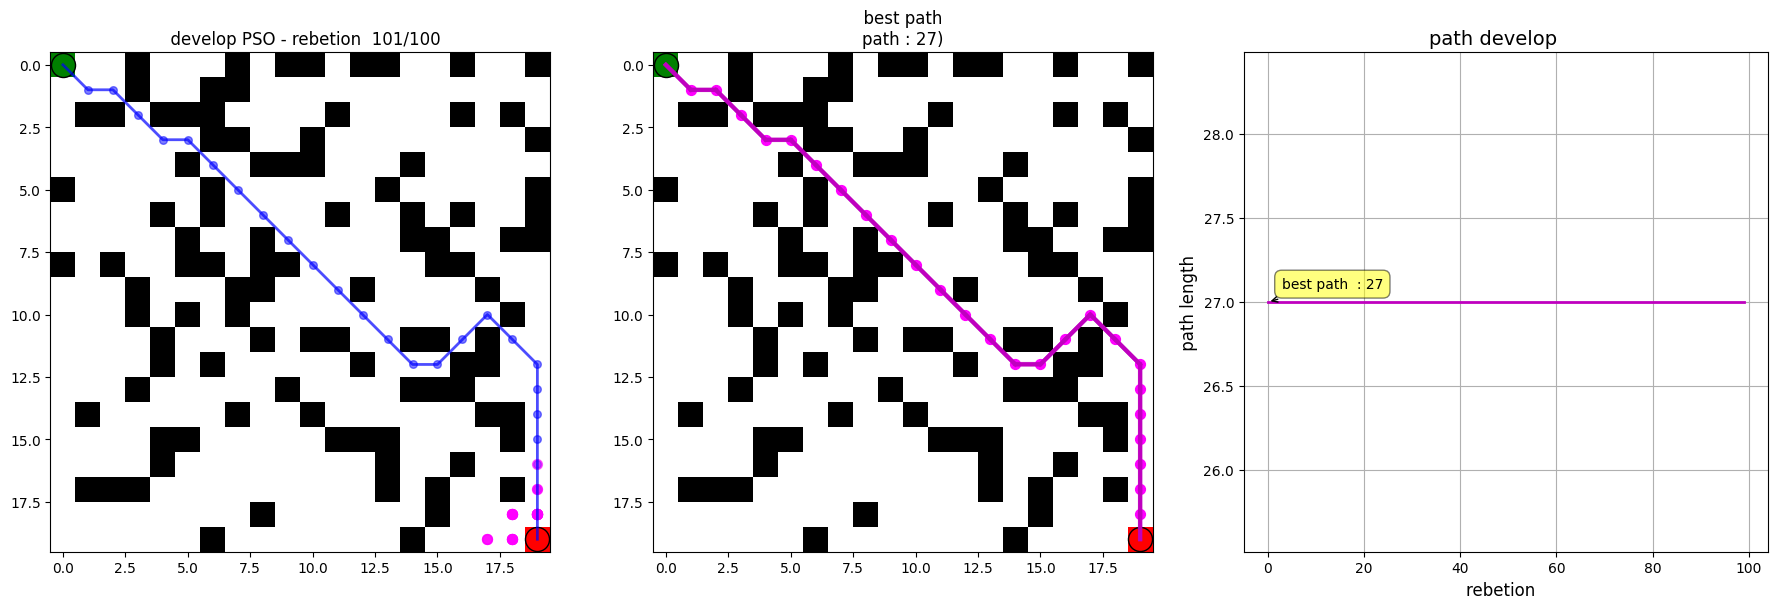


- best path : 27
- time taken  : 8.86 second 
- rebetion : 100
- num partivles : 50


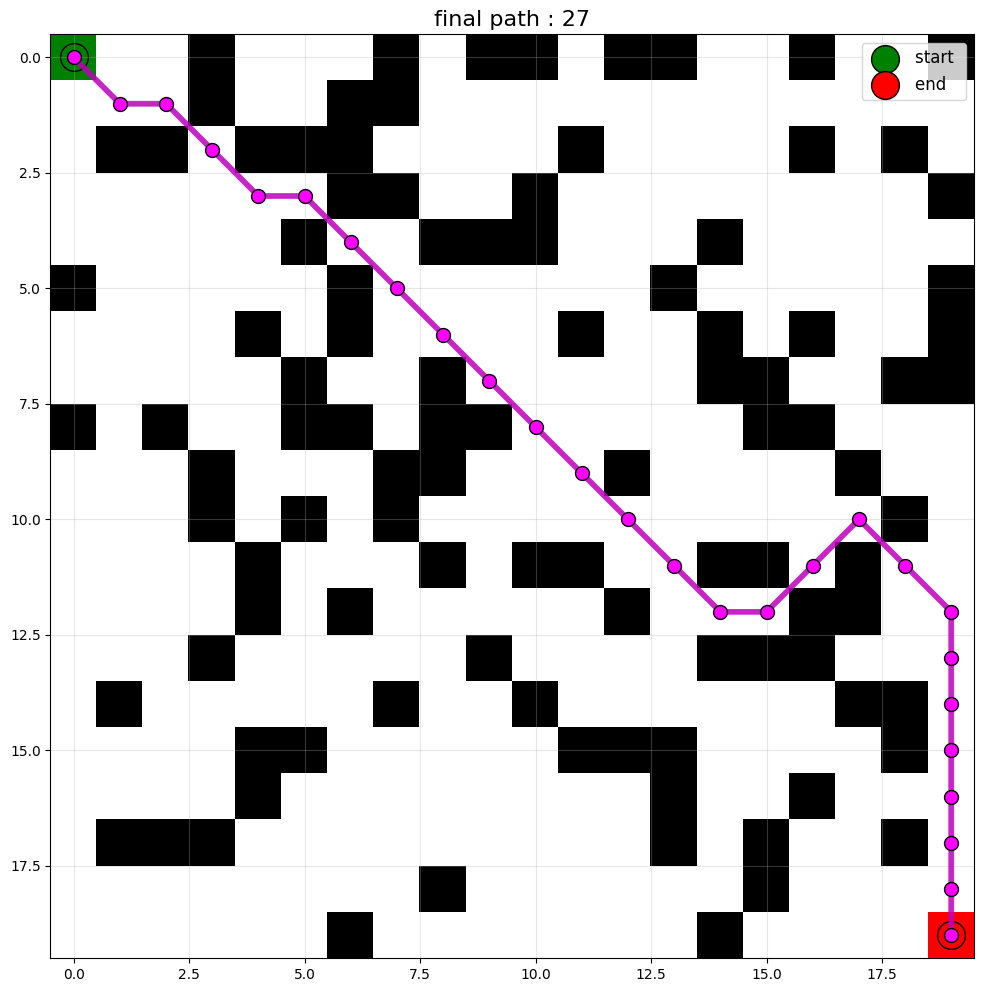

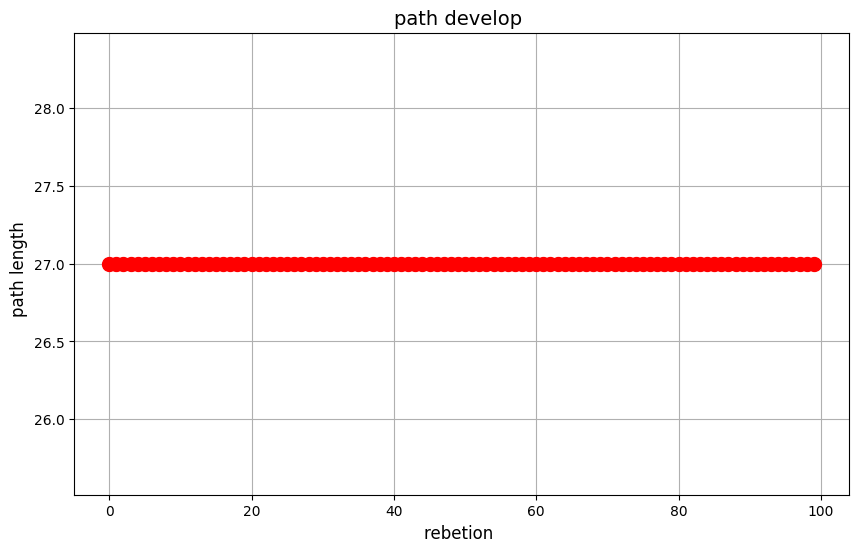

In [33]:

pso = PSOPathFinder(maze, start_pos, end_pos,
                          n_particles=50,
                          n_iterations=100,
                          w=0.8, c1=1.5, c2=1.5)


start_time = time.time()
best_path, best_length, history = pso.run()
execution_time = time.time() - start_time

print("\n" + "="*50)

print(f"- best path : {best_length if best_path else 'non '}")
print(f"- time taken  : {execution_time:.2f} second ")
print(f"- rebetion : {pso.n_iterations}")
print(f"- num partivles : {pso.n_particles}")
print("="*50)

if best_path:
    
    plt.figure(figsize=(12, 12))
    plt.imshow(maze, cmap=ListedColormap(['white', 'black', 'green', 'red']))
    

    path_x = [p[1] for p in best_path]
    path_y = [p[0] for p in best_path]
    plt.plot(path_x, path_y, 'm-', linewidth=4, alpha=0.7)
    

    for i in range(1, len(best_path)):
        plt.plot([best_path[i-1][1], best_path[i][1]], 
                 [best_path[i-1][0], best_path[i][0]], 
                 'm-', linewidth=4, alpha=0.5)
    
    plt.scatter(path_x, path_y, c='magenta', s=100, edgecolor='black', zorder=4)
    
   
    plt.scatter(start_pos[1], start_pos[0], c='green', s=400, marker='o', edgecolor='black', label='start ')
    plt.scatter(end_pos[1], end_pos[0], c='red', s=400, marker='o', edgecolor='black', label='end ')
    
    plt.title(f" final path : {len(best_path)} ", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(history, 'm-', linewidth=2)
    plt.scatter([i for i, h in enumerate(history) if h == min(history)], 
                [min(history)]*history.count(min(history)), 
                c='red', s=100, zorder=3)
    plt.xlabel('rebetion ', fontsize=12)
    plt.ylabel('path length  ', fontsize=12)
    plt.title('path develop ', fontsize=14)
    plt.grid(True)
    plt.show()
else:
    print("non ")


In [34]:
results = {
    'Algorithm': ['ABC', 'PSO', 'ACO'],
    'Best Path Length': [
        abc_length if abc_path is not None else 'None',
        best_length if best_path is not None else 'None',
        aco_best_length if aco_best_path is not None else 'None'
    ],
    'Execution Time (s)': [round(abc_time, 2), round(execution_time, 2), round(aco_time, 2)],
    'Iterations': [abc.n_iterations, pso.n_iterations, aco.n_iterations],
    'Agents': [abc.n_bees, pso.n_particles, aco.n_ants]
}


df = pd.DataFrame(results)


print(df.to_string(index=False))

Algorithm  Best Path Length  Execution Time (s)  Iterations  Agents
      ABC                41                6.73         100      50
      PSO                27                8.86         100      50
      ACO                39               13.77         100      50
